## GA1

In [ ]:
import numpy as np
import pandas as pd

#Importing the required statistical packages
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm, uniform, poisson
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import chisquare
from scipy.stats import chi2

#New
from scipy.stats import poisson
from scipy.stats import norm

In [ ]:
df = pd.read_excel('/content/Assignment-1_DataFinal.xlsx')

In [ ]:
df.head()

,CarID,Number of Scratches,Total scratch length (in mm)
0,CID0001,12,3.286511
1,CID0002,7,3.675818
2,CID0003,9,2.592105
3,CID0004,4,2.210933
4,CID0005,5,2.996678


In [ ]:
df.shape

(200, 3)

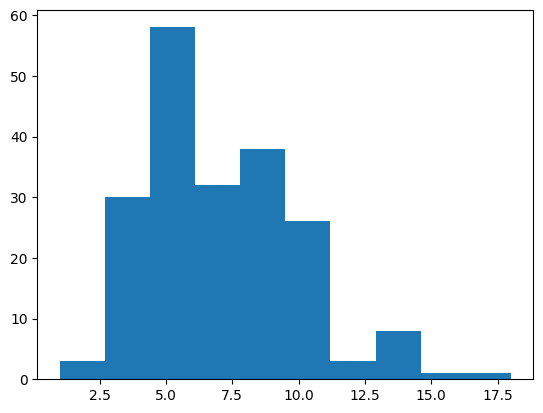

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['Number of Scratches'])
plt.show()

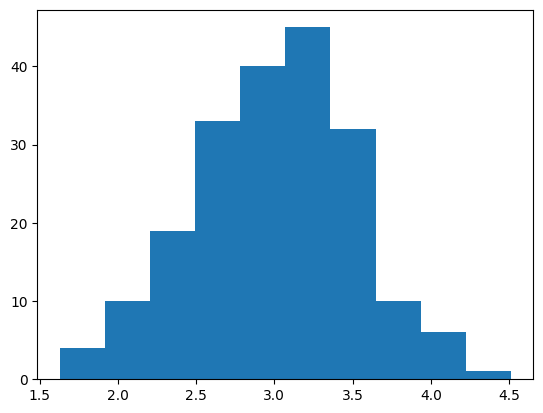

In [ ]:
plt.hist(df['Total scratch length (in mm)'])
plt.show()

In [ ]:
df.describe()

,Number of Scratches,Total scratch length (in mm)
count,200.000000,200.000000
mean,7.100000,3.002159
std,2.860228,0.510695
min,1.000000,1.629298
25%,5.000000,2.642296
50%,7.000000,3.044171
75%,9.000000,3.349201
max,18.000000,4.511674


In [ ]:
X = df['Number of Scratches']
df_2 = pd.DataFrame(X)
df_2

,Number of Scratches
0,12
1,7
2,9
3,4
4,5
...,...
195,11
196,10
197,9
198,5


In [ ]:
grouped_df = pd.DataFrame()
print(grouped_df)

Empty DataFrame
Columns: []
Index: []


In [ ]:
grouped_df['Observed Frequency']= df_2.groupby('Number of Scratches')['Number of Scratches'].count()
print(grouped_df)

                     Observed Frequency
Number of Scratches                    
1                                     1
2                                     2
3                                    15
4                                    15
5                                    32
6                                    26
7                                    32
8                                    23
9                                    15
10                                   12
11                                   14
12                                    3
13                                    4
14                                    4
15                                    1
18                                    1


In [ ]:
grouped_df['POISSON_PMF'] = poisson.pmf(k=grouped_df.index, mu=df_2['Number of Scratches'].mean())
print(grouped_df)

                     Observed Frequency  POISSON_PMF
Number of Scratches                                 
1                                     1     0.005858
2                                     2     0.020797
3                                    15     0.049219
4                                    15     0.087364
5                                    32     0.124057
6                                    26     0.146800
7                                    32     0.148897
8                                    23     0.132146
9                                    15     0.104249
10                                   12     0.074017
11                                   14     0.047774
12                                    3     0.028267
13                                    4     0.015438
14                                    4     0.007829
15                                    1     0.003706
18                                    1     0.000271


In [ ]:
grouped_df['Expected Frequency'] = grouped_df['POISSON_PMF']*len(df)
print(grouped_df)

                     Observed Frequency  POISSON_PMF  Expected Frequency
Number of Scratches                                                     
1                                     1     0.005858            1.171649
2                                     2     0.020797            4.159354
3                                    15     0.049219            9.843804
4                                    15     0.087364           17.472753
5                                    32     0.124057           24.811309
6                                    26     0.146800           29.360049
7                                    32     0.148897           29.779478
8                                    23     0.132146           26.429287
9                                    15     0.104249           20.849771
10                                   12     0.074017           14.803337
11                                   14     0.047774            9.554881
12                                    3     0.02826

In [ ]:
print(grouped_df['Observed Frequency'].sum())
print(grouped_df['Expected Frequency'].sum())

200
199.33773629634902


In [ ]:
delta = grouped_df['Observed Frequency'].sum() - grouped_df['Expected Frequency'].sum()
delta

0.6622637036509786

In [ ]:
grouped_df['Expected Frequency'].iloc[-1] += delta

<ipython-input-265-e7e587d54e0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_df['Expected Frequency'].iloc[-1] += delta


In [ ]:
grouped_df['no of scratches'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,18]

In [ ]:
grouped_df['expect']= grouped_df['no of scratches']*grouped_df['POISSON_PMF']

In [ ]:
grouped_df

,Observed Frequency,POISSON_PMF,Expected Frequency,no of scratches,expect
Number of Scratches,,,,,
1,1,0.005858,1.171649,1,0.005858
2,2,0.020797,4.159354,2,0.041594
3,15,0.049219,9.843804,3,0.147657
4,15,0.087364,17.472753,4,0.349455
5,32,0.124057,24.811309,5,0.620283
6,26,0.146800,29.360049,6,0.880801
7,32,0.148897,29.779478,7,1.042282
8,23,0.132146,26.429287,8,1.057171
9,15,0.104249,20.849771,9,0.938240


In [ ]:
grouped_df['expect'].sum()

7.058989406675117

In [ ]:
print(grouped_df['Observed Frequency'].sum())
print(grouped_df['Expected Frequency'].sum())

200
200.0


In [ ]:
chisquare(grouped_df['Observed Frequency'], grouped_df['Expected Frequency'])

Power_divergenceResult(statistic=17.016461417808664, pvalue=0.3178812924448776)

In [ ]:
#Determine the Tabulated Value of the Test Statistic
chi2.ppf(0.95,len(grouped_df)-1-1)

23.684791304840576

In [ ]:
len(grouped_df)-1-1

14

In [ ]:
X = df['Total scratch length (in mm)']
df_2 = pd.DataFrame(X)
df_2

,Total scratch length (in mm)
0,3.286511
1,3.675818
2,2.592105
3,2.210933
4,2.996678
...,...
195,3.299352
196,2.379584
197,3.202239
198,3.069932


In [ ]:
df_2['Bins'] = pd.cut(df['Total scratch length (in mm)'], bins=8)
print(df_2)

     Total scratch length (in mm)            Bins
0                        3.286511   (3.07, 3.431]
1                        3.675818  (3.431, 3.791]
2                        2.592105    (2.35, 2.71]
3                        2.210933    (1.99, 2.35]
4                        2.996678    (2.71, 3.07]
..                            ...             ...
195                      3.299352   (3.07, 3.431]
196                      2.379584    (2.35, 2.71]
197                      3.202239   (3.07, 3.431]
198                      3.069932    (2.71, 3.07]
199                      3.440745  (3.431, 3.791]

[200 rows x 2 columns]


In [ ]:
df_3 = pd.DataFrame()
df_3 ["Observed Frequency"] = (df_2.groupby('Bins').count())
df_3

,Observed Frequency
Bins,
"(1.626, 1.99]",4
"(1.99, 2.35]",19
"(2.35, 2.71]",34
"(2.71, 3.07]",49
"(3.07, 3.431]",51
"(3.431, 3.791]",33
"(3.791, 4.151]",9
"(4.151, 4.512]",1


In [ ]:
mu = df['Total scratch length (in mm)'].mean()

In [ ]:
sigma = df['Total scratch length (in mm)'].std()

In [ ]:
norm.cdf(4.512,loc=mu,scale=sigma)

0.9984439438944995

In [ ]:
normal = [0.023743,0.100800,0.283633,0.552839,0.799467,0.938783,0.987761,1] #0.998443

In [ ]:
normal_pmf = [0.023743,0.077057,0.182833,0.269206,0.246628,0.139316,0.048978,0.012239]

In [ ]:
df_3['NORMAL_PMF'] = normal_pmf
df_3

,Observed Frequency,NORMAL_PMF
Bins,,
"(1.626, 1.99]",4,0.023743
"(1.99, 2.35]",19,0.077057
"(2.35, 2.71]",34,0.182833
"(2.71, 3.07]",49,0.269206
"(3.07, 3.431]",51,0.246628
"(3.431, 3.791]",33,0.139316
"(3.791, 4.151]",9,0.048978
"(4.151, 4.512]",1,0.012239


In [ ]:
df_3['Expected Frequency'] = df_3['NORMAL_PMF']*200
df_3

,Observed Frequency,NORMAL_PMF,Expected Frequency
Bins,,,
"(1.626, 1.99]",4,0.023743,4.7486
"(1.99, 2.35]",19,0.077057,15.4114
"(2.35, 2.71]",34,0.182833,36.5666
"(2.71, 3.07]",49,0.269206,53.8412
"(3.07, 3.431]",51,0.246628,49.3256
"(3.431, 3.791]",33,0.139316,27.8632
"(3.791, 4.151]",9,0.048978,9.7956
"(4.151, 4.512]",1,0.012239,2.4478


In [ ]:
df_3['mid_point'] = [1.808,2.172,2.536,2.9,3.264,3.628,3.992,4.356]
df_3['expect'] = df_3['mid_point'] * df_3['NORMAL_PMF']
df_3

,Observed Frequency,NORMAL_PMF,Expected Frequency,mid_point,expect
Bins,,,,,
"(1.626, 1.99]",4,0.023743,4.7486,1.808,0.042927
"(1.99, 2.35]",19,0.077057,15.4114,2.172,0.167368
"(2.35, 2.71]",34,0.182833,36.5666,2.536,0.463664
"(2.71, 3.07]",49,0.269206,53.8412,2.900,0.780697
"(3.07, 3.431]",51,0.246628,49.3256,3.264,0.804994
"(3.431, 3.791]",33,0.139316,27.8632,3.628,0.505438
"(3.791, 4.151]",9,0.048978,9.7956,3.992,0.195520
"(4.151, 4.512]",1,0.012239,2.4478,4.356,0.053313


In [ ]:
df_3['expect'].sum()

3.013922536

In [ ]:
print(df_3['Observed Frequency'].sum())
print(df_3['Expected Frequency'].sum())

200
200.0


In [ ]:
print(df_3['NORMAL_PMF'].sum())

1.0


In [ ]:
chisquare(grouped_df['Observed Frequency'], grouped_df['Expected Frequency'])

Power_divergenceResult(statistic=17.016461417808664, pvalue=0.3178812924448776)

In [ ]:
chi2.ppf(0.95,8-3)

11.070497693516351

## GA2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import pandas.util.testing as tm

In [ ]:
df = pd.read_excel('/content/data_transform.xlsx')

In [ ]:
df.head()

,Price,Sales
0,2.20,68.9
1,7.48,15.6
2,7.26,19.5
3,3.08,35.1
4,8.14,10.4


<Axes: xlabel='Price', ylabel='Sales'>

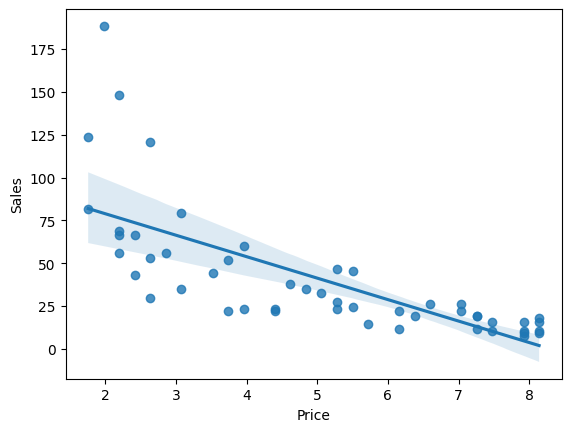

In [ ]:
sns.regplot(x="Price", y="Sales", data=df, fit_reg=True)

In [ ]:
model2 = smf.ols(formula='Sales ~ Price', data=df)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     53.34
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           2.52e-09
Time:                        14:44:36   Log-Likelihood:                -232.84
No. Observations:                  50   AIC:                             469.7
Df Residuals:                      48   BIC:                             473.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    103.9905      9.372     11.095      0.0

In [ ]:
df2 = pd.DataFrame()
df2['naturalLogPrice'] = np.log(df['Price'])
df2['naturalLogSales'] = np.log(df['Sales'])

In [ ]:
df2.head()

,naturalLogPrice,naturalLogSales
0,0.788457,4.232656
1,2.012233,2.747271
2,1.982380,2.970414
3,1.124930,3.558201
4,2.096790,2.341806


<Axes: xlabel='naturalLogPrice', ylabel='naturalLogSales'>

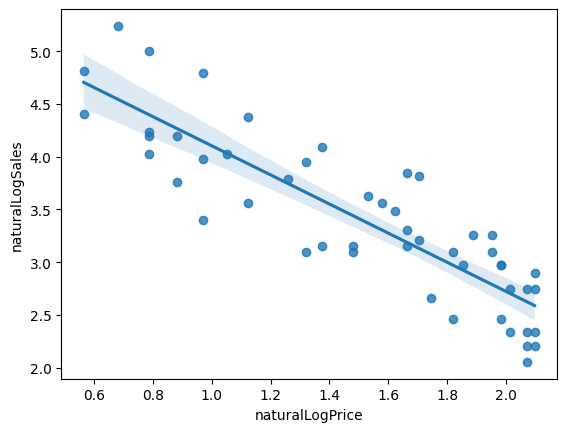

In [ ]:
sns.regplot(x="naturalLogPrice", y="naturalLogSales", data=df2, fit_reg=True)

In [ ]:
model3 = smf.ols(formula='naturalLogSales ~ naturalLogPrice', data=df2)
results3 = model3.fit()
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:        naturalLogSales   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     152.0
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           1.74e-16
Time:                        14:50:42   Log-Likelihood:                -22.079
No. Observations:                  50   AIC:                             48.16
Df Residuals:                      48   BIC:                             51.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.4848      0.177     

In [ ]:
X = pd.read_excel('/content/X.xlsx')
y = pd.read_excel('/content/y.xlsx')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,y_pred)

0.9347068473282426

In [ ]:
reg.intercept_

array([69744.98712385])

In [ ]:
reg.coef_

array([[ 7.73467193e-01,  3.28845975e-02,  3.66100259e-02,
        -9.59284160e+02,  6.99369053e+02]])

In [ ]:
X_test

,Safety Features,Tech Features,Marketing Spend,Premium Hatchback,SUV
28,76051.52,162645.56,138148.20,1,0
11,110671.96,71790.61,269744.55,0,0
10,111913.08,90594.11,249160.95,1,0
41,37892.92,64710.77,184470.71,1,0
2,163441.51,81145.55,427934.54,1,0
27,82107.60,107864.55,373183.81,0,1
38,30229.59,45947.93,205265.10,0,1
31,71136.38,132701.92,108218.23,0,1
22,83994.56,102782.75,323319.26,1,0
4,152107.34,71391.77,386168.42,1,0


In [ ]:
X

,Safety Features,Tech Features,Marketing Spend,Premium Hatchback,SUV
0,175349.20,116897.80,491784.10,0,1
1,172597.70,131377.59,463898.53,0,0
2,163441.51,81145.55,427934.54,1,0
3,154372.41,98671.85,403199.62,0,1
4,152107.34,71391.77,386168.42,1,0
5,141876.90,79814.71,382861.36,0,1
6,144615.46,127198.87,147716.82,0,0
7,140298.13,125530.06,343876.68,1,0
8,130542.52,128718.95,331613.29,0,1
9,133334.88,88679.17,324981.62,0,0


In [ ]:
y_train.describe()

,Profit
count,40.000000
mean,144446.447250
std,40981.182781
min,49681.400000
25%,122713.295000
50%,142978.190000
75%,168028.825000
max,227261.830000


In [ ]:
y_test.describe()

,Profit
count,10.00000
mean,157277.40700
std,37696.02975
min,112798.83000
25%,133933.26500
50%,142680.28000
75%,180656.31250
max,226050.39000


## GA 3

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
train = pd.read_csv('/content/train_LR.csv')

In [ ]:
train.shape

(109244, 13)

In [ ]:
train.isnull().sum()

Tier                0
FICO                0
Term                0
Amount              0
Previous_Rate       0
Competition_rate    0
Rate                0
Cost_Funds          0
Partner Bin         0
Car_Type_N          0
Car_Type_R          0
Car_Type_U          0
Accept              0
dtype: int64

In [ ]:
train['Accept'].value_counts()

0    85258
1    23986
Name: Accept, dtype: int64

In [ ]:
(85258/109244)*100

78.0436454175973

In [ ]:
(23986/109244)*100

21.956354582402696

In [ ]:
y_train = train['Accept']
X_train = train.drop(columns=['Accept'])

In [ ]:
X_train

,Tier,FICO,Term,Amount,Previous_Rate,Competition_rate,Rate,Cost_Funds,Partner Bin,Car_Type_N,Car_Type_R,Car_Type_U
0,2,729,66,22000.0,-10,5.75,6.29,1.1625,1,0,0,1
1,1,786,60,37000.0,-10,4.09,4.09,1.1400,2,1,0,0
2,1,742,60,25000.0,-10,3.99,3.99,1.1163,3,1,0,0
3,1,631,60,25000.0,-10,4.59,4.49,1.6150,1,1,0,0
4,4,656,72,27300.0,-10,5.35,7.99,1.1200,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
109239,1,786,36,35000.0,-10,3.79,3.79,1.1800,1,1,0,0
109240,2,692,36,11900.0,6,4.75,5.03,1.1000,3,0,1,0
109241,1,800,60,26955.0,-10,5.49,5.24,1.8100,3,1,0,0
109242,1,746,48,33000.0,-10,4.99,4.44,1.3800,3,1,0,0


In [ ]:
test = pd.read_csv('/content/test_LR.csv')

In [ ]:
test.shape

(36415, 13)

In [ ]:
test

,Tier,FICO,Term,Amount,Previous_Rate,Competition_rate,Rate,Cost_Funds,Partner Bin,Car_Type_N,Car_Type_R,Car_Type_U,Accept
0,2,725,72,30500.0,5,6.09,4.99,1.1200,2,0,1,0,0
1,1,739,60,25995.0,-10,4.79,4.79,1.9590,2,0,0,1,0
2,2,715,48,30000.0,5,5.19,4.79,1.1200,2,0,1,0,0
3,1,742,60,45000.0,-10,4.59,4.59,1.5788,3,1,0,0,0
4,4,649,60,27900.0,-10,4.49,6.99,1.3206,3,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36410,1,739,36,11400.0,9,4.75,4.75,1.1413,1,0,1,0,1
36411,2,704,72,15800.0,12,6.09,6.94,1.1194,3,0,1,0,1
36412,1,761,60,36000.0,-10,4.89,3.89,1.3400,2,1,0,0,0
36413,1,752,48,12093.0,10,5.29,5.25,1.1100,3,0,1,0,1


In [ ]:
test['Accept'].value_counts()

0    28350
1     8065
Name: Accept, dtype: int64

In [ ]:
(28350/36415)*100

77.85253329671839

In [ ]:
(8065/36415)*100

22.147466703281616

In [ ]:
y_test = test['Accept']
X_test = test.drop(columns=['Accept'])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_rev = LogisticRegression(random_state=17)
log_rev.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=17)

In [ ]:
y_pred_train = log_rev.predict(X_train)

In [ ]:
log_rev.score(X_train,y_train)

0.8052433085569917

In [ ]:
y_pred_test = log_rev.predict(X_test)

In [ ]:
log_rev.score(X_test,y_test)

0.8001922284772759

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     85258
           1       0.61      0.32      0.42     23986

    accuracy                           0.81    109244
   macro avg       0.72      0.63      0.65    109244
weighted avg       0.78      0.81      0.78    109244



In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     28350
           1       0.59      0.31      0.41      8065

    accuracy                           0.80     36415
   macro avg       0.71      0.63      0.64     36415
weighted avg       0.78      0.80      0.78     36415



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
confusion_matrix(y_test,y_pred_test.ravel())

array([[26624,  1726],
       [ 5550,  2515]])

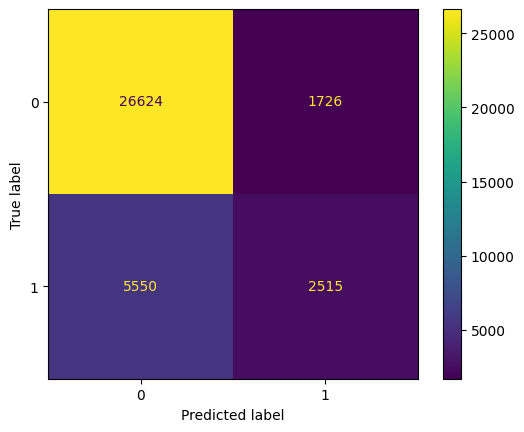

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_test))
disp.plot()